# 2.5. Automatic Differentiation

## 📘 Code Along

### 2.5.1. A Simple Function

In [1]:
import torch

In [2]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [3]:
# Can also create x = torch.arange(4.0, requires_grad=True)
x.requires_grad_(True)
x.grad

In [4]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [5]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [6]:
x.grad == 4 * x

tensor([True, True, True, True])

In [7]:
x.grad.zero_() # reset the gradient
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

### 2.5.2. Backward for Non-Scalar Variables

In [8]:
x.grad.zero_()
y = x * x
y.backward(gradient=torch.ones(len(y))) # faster y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

### 2.5.3. Detaching Computation

In [9]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [10]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

### 2.5.4. Gradients and Python Control Flow

In [11]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [12]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

In [13]:
a.grad == d / a

tensor(True)

## 📝 Exercises

### Exercise 1

Why is the second derivative much more expensive to compute than the first derivative?

If we assume in the first derivative $n$ partial derivatives need to be computed it is $n^2$ for the second derivative because all cross combinations need to be computed (the Hessian).

### Exercise 2

After running the function for backpropagation, immediately run it again and see what happens. Investigate.

In [14]:
v = torch.arange(4.0, requires_grad=True)
w = v * v
w.sum().backward(retain_graph=True)
v.grad, w

(tensor([0., 2., 4., 6.]), tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>))

In [15]:
w.sum().backward()
v.grad, w

(tensor([ 0.,  4.,  8., 12.]),
 tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>))

### Exercise 3

In the control flow example where we calculate the derivative of d with respect to a, what would happen if we changed the variable a to a random vector or a matrix? At this point, the result of the calculation f(a) is no longer a scalar. What happens to the result? How do we analyze this?

f(a) returns the same shape as a was. Inside f(a) everything works fine but d.backward() just works on a scalar. This can be fixed for example by changing it to d.sum().backward() which for scalars is still the same as d.backward().

### Exercise 4

Let $f(x) = \sin(x)$. Plot the graph of $f$ and of its derivative $f'$. Do not exploit the fact that $f'(x) = \cos(x)$ but rather use automatic differentiation to get the result.

In [16]:
%matplotlib inline
import numpy as np

import sys
sys.path.append("../..")  # add parent directory to path
import utils.plotting as plt_utils

In [17]:
x = torch.arange(0, 7, 0.1, requires_grad=True)

def f(x):
    return torch.sin(x)

In [21]:
y = f(x)
y.sum().backward()
x.grad, y

(tensor([ 1.0000,  0.9950,  0.9801,  0.9553,  0.9211,  0.8776,  0.8253,  0.7648,
          0.6967,  0.6216,  0.5403,  0.4536,  0.3624,  0.2675,  0.1700,  0.0707,
         -0.0292, -0.1288, -0.2272, -0.3233, -0.4161, -0.5048, -0.5885, -0.6663,
         -0.7374, -0.8011, -0.8569, -0.9041, -0.9422, -0.9710, -0.9900, -0.9991,
         -0.9983, -0.9875, -0.9668, -0.9365, -0.8968, -0.8481, -0.7910, -0.7259,
         -0.6536, -0.5748, -0.4903, -0.4008, -0.3073, -0.2108, -0.1122, -0.0124,
          0.0875,  0.1865,  0.2837,  0.3780,  0.4685,  0.5544,  0.6347,  0.7087,
          0.7756,  0.8347,  0.8855,  0.9275,  0.9602,  0.9833,  0.9965,  0.9999,
          0.9932,  0.9766,  0.9502,  0.9144,  0.8694,  0.8157]),
 tensor([ 0.0000,  0.0998,  0.1987,  0.2955,  0.3894,  0.4794,  0.5646,  0.6442,
          0.7174,  0.7833,  0.8415,  0.8912,  0.9320,  0.9636,  0.9854,  0.9975,
          0.9996,  0.9917,  0.9738,  0.9463,  0.9093,  0.8632,  0.8085,  0.7457,
          0.6755,  0.5985,  0.5155,  0.4274,

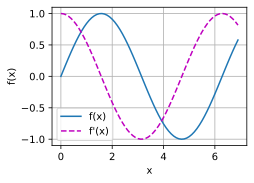

In [23]:
plt_utils.plot(x.detach().numpy(), [y.detach().numpy(), x.grad.detach().numpy()], 'x', 'f(x)', legend=['f(x)', 'f\'(x)'])

### Exercise 5-8

left out because I already did similar things in the tinygrad tutorial by Andrej Karpathy